In [1]:
#ROOT = Path(__file__).resolve().parents[0]

In [2]:
import os
import tarfile
import requests
import kaggle
import pandas as pd
import json
from pathlib import Path
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlas
import matplotlib
from IPython.display import display
from random import choices
plt.style.use("ggplot")
from matplotlib.pyplot import figure
import time


In [3]:
ROOT = os.getcwd()


In [4]:
def fetch_data(download_url, download_path):
    kaggle.api.authenticate()
    kaggle.api.dataset_download_files(download_url, path=download_path, unzip=True)
    return kaggle.api.dataset_list_files(download_url).files

In [5]:
def import_load_data(csv_path, encoding="ISO-8859-1"):
    
    encoding = input("Default enconding is ISO-8859-1, do you prefer another one? Please type it.")
    
    try:
        df = pd.read_csv(csv_path, encoding=encoding)
    except:
        df = pd.read_csv(csv_path, encoding="ISO-8859-1")
    return df

In [6]:
def download_import_kaggle():
    
    download_root = input("Please enter the url where your desired csv is: ")
    download_path = os.path.join("dataset")
    
    download_url = download_root.split("/", 3)[3]
    csv_files = fetch_data(download_url, download_path)

    if len(csv_files) == 1:
        csv_path = ROOT + "/dataset/" + str(csv_files[0])
    else:
        csv_file = input(f"Please what file did you need to import from this list {csv_files}?: ")
        csv_path = ROOT + "/dataset/" + csv_file
    return import_load_data(csv_path, encoding="ISO-8859-1")


In [7]:
df = download_import_kaggle()
#https://www.kaggle.com/teajay/global-shark-attacks

Please enter the url where your desired csv is: https://www.kaggle.com/teajay/global-shark-attacks
Default enconding is ISO-8859-1, do you prefer another one? Please type it.


In [8]:
def first_transformation(df):
    df = df.applymap(lambda s:s.lower() if type(s) == str else s)
    df.columns = df.columns.str.lower()
    df.columns = df.columns.str.strip()
    instant_df = pd.DataFrame()
    inf_df = pd.DataFrame(index=range(1))
    cols = df.columns
    for col in cols:
        pct_missing = np.mean(df[col].isnull())
        inf_df[col] = f"{round(pct_missing*100)}%"
        missing = df[col].isnull()
        num_missing = np.sum(missing)

        if num_missing > 0:
            instant_df[f"{col}_is_missing"] = missing
        else:
            instant_df[f"{col}_is_missing"] = 0
    display(inf_df.T)
    is_missing_cols = [col for col in instant_df.columns if "is_missing" in col]
    instant_df["num_missing"] = instant_df[is_missing_cols].sum(axis = 1)
    if len(cols) < 30:
        colors = ["#000099", "#ffff00"]
        sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colors))
    else:
        instant_df["num_missing"].value_counts().reset_index().sort_values(by="index").plot.bar(x = "index", y = "num_missing")
    plt.show()
    return df


In [9]:
def drop_columns_nans(df, max_nan=0, subset=None, keep="first", toppct = 0.95):
    a = df.shape
    #quitar columnas vacias y duplicadas
    df.dropna(axis=1, how="all", inplace=True)
    df = df.T.drop_duplicates().T
    #quitar filas por condicion Thresh y filas duplicadas
    df = df.dropna(axis=0, thresh=max_nan)
    df.drop_duplicates(subset, keep, inplace=True)
    #columnas estadisticamente irrelevantes
    num_rows = len(df.index)
    low_information_cols = []
    for col in df.columns:
        cnts = df[col].value_counts(dropna=False)
        top_pct = (cnts/num_rows).iloc[0]
        if top_pct > toppct:
            low_information_cols.append(col)
    df.drop(low_information_cols, axis=1, inplace=True)
    b = df.shape
    columns_dropped = a[1] - b[1]
    rows_dropped = a[0] - b[0]
    print(f"{columns_dropped} columns dropped")
    print(f"{rows_dropped} rows dropped")
    print(f"The new shape is {b[0]} rows and {b[1]} columns")
    return df


In [10]:
def all_or_part_df(df):
    print(df.columns.tolist())
    while True:
        columns = input("Write only the columns you want to work with. Without and separated by ,")
        new_columns = columns.replace("\'", "").split(",")
        new_columns = [i.strip() for i in new_columns]
        try:
            df = df[new_columns]
            return df
        except:
            print("Wrong columns. Try other columns")
            continue



In [11]:
def first_view(df):
    df = first_transformation(df)
    
    
    duplicates = input("Do you want to remove duplicates,empty rows/columns, and irrelevant stadistical columns? y/n")
    if duplicates == "y":
        max_nan = int(input(f"Who must be the maximum nan values in a row? Please insert a value between 0-{len(df.columns)}: "))
        toppct = 0.01 * float(input("What is the maximum % of nan in a column to be stadistical relevant? Insert a value between 0-100, (default is 95%): "))
        df = drop_columns_nans(df, max_nan=0, keep="first", toppct = 0.95)
                       
    display(df.head())
    
    part = input("Do you want to use all the df(yes) or just a part(n)? y/n: ")
    if part == "n":
        df = all_or_part_df(df)
        
    print("\n"*3)
    display(df.head())

    return df


,0
case number,0%
date,0%
year,0%
type,0%
country,1%
area,7%
location,9%
activity,9%
name,3%
sex,9%


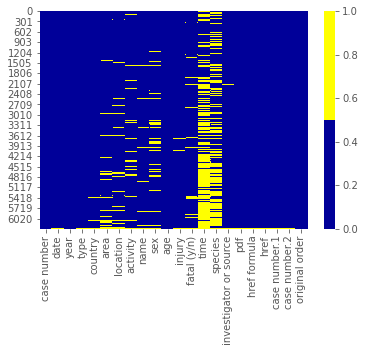

Do you want to remove duplicates,empty rows/columns, and irrelevant stadistical columns? y/nn


,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
0,2018.06.25,25-jun-2018,2018.0,boating,usa,california,"oceanside, san diego county",paddling,julie wolfe,f,...,n,18h00,white shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-jun-2018,2018.0,unprovoked,usa,georgia,"st. simon island, glynn county",standing,adyson mcneely,f,...,n,14h00 -15h00,NaN,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-jun-2018,2018.0,invalid,usa,hawaii,"habush, oahu",surfing,john denges,m,...,n,07h45,NaN,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-jun-2018,2018.0,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,...,n,NaN,2 m shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-jun-2018,2018.0,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,...,n,NaN,"tiger shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


Do you want to use all the df(yes) or just a part(n)? y/n: y






,case number,date,year,type,country,area,location,activity,name,sex,...,fatal (y/n),time,species,investigator or source,pdf,href formula,href,case number.1,case number.2,original order
0,2018.06.25,25-jun-2018,2018.0,boating,usa,california,"oceanside, san diego county",paddling,julie wolfe,f,...,n,18h00,white shark,"r. collier, gsaf",2018.06.25-wolfe.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.25,2018.06.25,6303.0
1,2018.06.18,18-jun-2018,2018.0,unprovoked,usa,georgia,"st. simon island, glynn county",standing,adyson mcneely,f,...,n,14h00 -15h00,NaN,"k.mcmurray, trackingsharks.com",2018.06.18-mcneely.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.18,2018.06.18,6302.0
2,2018.06.09,09-jun-2018,2018.0,invalid,usa,hawaii,"habush, oahu",surfing,john denges,m,...,n,07h45,NaN,"k.mcmurray, trackingsharks.com",2018.06.09-denges.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.09,2018.06.09,6301.0
3,2018.06.08,08-jun-2018,2018.0,unprovoked,australia,new south wales,arrawarra headland,surfing,male,m,...,n,NaN,2 m shark,"b. myatt, gsaf",2018.06.08-arrawarra.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.08,2018.06.08,6300.0
4,2018.06.04,04-jun-2018,2018.0,provoked,mexico,colima,la ticla,free diving,gustavo ramos,m,...,n,NaN,"tiger shark, 3m",a .kipper,2018.06.04-ramos.pdf,http://sharkattackfile.net/spreadsheets/pdf_di...,http://sharkattackfile.net/spreadsheets/pdf_di...,2018.06.04,2018.06.04,6299.0


In [35]:
df = first_view(df)

In [36]:
def numeric_search(df, tries = 5):
    to_num = []
    for col in df.columns.tolist():
        while True:
            five = choices(df[col], k=tries)
            five = [i for i in five if i is not np.nan]
            if len(five) == 5:
                break
        try:
            five_true = list(map(float, five))
            to_num.append(col)
        except ValueError:
            continue
    for col in to_num:
        if df[col].astype(int) or df[col].astype(float):
            continue
        else:
            fill = input(f"For the column \"{col}\", do you want to fill the nan with median, mean or nan? Write one of them.")
            df = col_to_num(df, col, type="float64", fill= fill)
    return df

In [40]:
def data_wrangling():
    print(df.info())
    numeric = input("Do you want to change a column to a numerical type? y/n: ")
    if numeric == "y":
        auto = input("Do you want it to make it automatic(y) or by yourself(n)? y/n: ")
        numeric_search(df)
    #display(df.describe().T)
    #df.hist(bins=50, figsize =(20,15))
    #plt.show()
    return df



In [41]:
df = data_wrangling()
df.info()

AttributeError: 'NoneType' object has no attribute 'info'

In [27]:


# In[9]:


def col_to_num(df, col, type="float64", fill="nan"):
    try:
        df[col] = df[col].str.replace(r"^[[+-]?[0-9]*\.?[0-9]+] | [^\w\s*] | [a-zA-Z]|½|\?|<|>|\"|-|\(|\)|\.|\'| |&", "", regex = True)
    except AttributeError:
        pass
    df[col] = pd.to_numeric(df[col], errors = "coerce")
    #elegir entre median, mean u otro valor
    if fill == "median":
        median = df[col].median()
        df[col].fillna(median, inplace=True)
        return df
    elif fill == "mean":
        mean = df[col].mean()
        df[col].fillna(mean, inplace=True)
        return df
    else:
        df[col].fillna(fill, inplace=True)
        return df


# In[10]:


def categorical_search(df):
    insta_df = pd.DataFrame()
    df_non_numeric = df.select_dtypes(exclude = [np.number])
    non_numeric_cols = df_non_numeric.columns.values.tolist()
    prob_cat = []
    for col in non_numeric_cols:
        a = df.stb.freq([col], thresh= 0.9*100, other_label = "0ther")
        display(a)
        print("-----------------------------------------------------------------------")
        if len(df[col].value_counts()) < len(df.index)*0.05:
            prob_cat.append(col)
    return prob_cat


# In[11]:


def transform_cat(df):
    prob_cat = categorical_search(df)
    while True:
        answer_cat1 = input("Do you want to transform columns to category? yes or no?")
        if answer_cat1.lower() == "no":
            return df
        elif answer_cat1.lower() == "yes":
            while True:
                answer_cat2 = input(f"Wich columns do you want to change? Make a list without spaces and []. My suggestion is {prob_cat}")
#Arreglar para una lista más amplia
                lst = list(answer_cat2.split(","))
                if lst in df.columns.tolist():
                    for col in lst:
                        pattern = []
                        while True:
                            answer_cat3 = input("Do you want to make a pattern? yes or no?")
                            if answer_cat3 == "no":
                                df = stand_categorical()
                                return df
                            elif answer_cat3 == "yes":
                                print(df[col].values_count())
                                pattern = make_pattern()
                                df = stand_categorical()
                            else:
                                print("Please enter yes or no")
                                continue
            else:
                print("Try another list of columns")
        else:
            return df


# In[15]:


def make_pattern(col, pattern):
    while True:
        tuples = input("Please write the words to change like a tuple: Example: (\"word_to_change\", \"word_change\")")
        if isintance(tuples, tuple):
            pat = (df[col].str.contains(tuples[0], case=False, regex=False, na=False), tuples[1])
            pattern.append(pat)
        else:
            finish = input("Have you finished?? Write end or left blank.")
            if finish == "" or finish.lower() == "end":
                return pattern
            else: 
                continue


# In[16]:


def stand_categorical(col, pattern, other= None):
    df[col] = df[col].astype("category")
    store_criteria, store_values = zip(*pattern)
    df[f"{col}_new"] = np.select(store_criteria, store_values, other)
    df[col] = df[f"{col}_new"].combine_first(df[col])
    return df
    


# In[17]:


def clean_datetime(df, col, new_columns):
    df[col] = df[col].str.replace(r"^[[+-]?[0-9]*\.?[0-9]+]|[^\w\s*] | ½|\?|<|>|\"|-|\(|\)|\.|\'| |&]|reported", "", regex = True)
    df[col]  = pd.to_datetime(df[col], errors= "coerce")
    df[col] = df[col].astype("datetime64[D]", errors="ignore")
    if new_columns:
        df["year"] = df[col].dt.year
        df["month"] = df[col].dt.month
        df["day"] = df[col].dt.day
        df.drop([col], axis = 1, inplace = True)
    return df


# In[20]:


def stand_datetime(df):
    while True:
        answer_date = input("Do you want to clean de datetime column? yes or no?")
        if answer_date.lower() == "no":
            break
        elif answer_date.lower() == "yes":
            while True:
                col = input("Wich column do you want to change. Please enter the name of the column.")
                col = col.lower()
                if col in df.columns.tolist():
                    while True:
                        answer_date3 = input("Do you want to generate new columns with year, month and day?")
                        if answer_date3 == "yes":
                            df = clean_datetime(df, col, new_columns=True)
                            return df
                        else:
                            df = clean_datetime(df, col, new_columns=False) 
                            return df
                else:
                    break                        
        else:
            print("Please enter yes or no.")
            continue


# In[21]:


def fill_all(df, fill):
    df_numeric = df.select_dtypes(include = [np.number])
    df_numeric_columns = df_numeric.columns.tolist()
    df_categoric = df.select_dtypes(include = "category")
    df_categoric_columns = df_categoric.columns.tolist()
    for col in df_numeric_columns:
        if fill == "median":
            median = df[col].median()
            df[col].fillna(median, inplace=True)
        if fill == "mean":
            mean = df[col].mean()
            df[col].fillna(mean, inplace=True)
    for col in df_categoric_columns:
        mode = df[col].mode()
        df[col].fillna(mode, inplace=True)
    return df


# In[23]:


def finish_fill(df):
    while True:
        answer_fill = input("Do you want to fill the rest of the DataFrame? yes or no?")
        if answer_fill.lower() == "no":
            return df
        elif answer_fill.lower() == "yes":
            while True:
                fill = input("With what do you want to fill, choose one of these: median, mean")
                if fill.lower() in ["median", "mean"]:
                    fill = fill.lower()
                    df = fill_all(df, fill)
                    return df
                else:
                    return df
        else:
            return df
